<div style="text-align: center;">

# <strong>Atividade 2: Explorando Fronteiras de Decisão</strong>

#### Tópicos Avançados em IC 2 - 2024.2

#### Universidade Federal de Pernambuco (UFPE)

---

**Aluna:** Bruna Zamith Santos  

**Professor:** Dr. Ricardo Prudêncio

**Data:** 27/08/2024

---

</div>


# <a id="TOC">Tabela de Conteúdos</a>

- [**1. Introdução**](#Introducao)
- [**2. Bibliotecas**](#Bibliotecas)
- [**3. Conjunto de Dados**](#ConjuntoDados)
- [**4. Baseline (Apresentado pelo Professor)**](#Baseline)
- [**5. Testando Diferentes Parâmetros (a) e (b)**](#TestParams)
    - [5.1. [Test Case 1] max_depth = 50; min_samples_leaf = 10](#TestParams1)
    - [5.2. [Test Case 2] max_depth = 5; min_samples_leaf = 1](#TestParams2)
    - [5.3. [Test Case 3] max_depth = 50; min_samples_leaf = 1](#TestParams3)
    - [5.4. [Test Case 4] max_depth = 2; min_samples_leaf = 20](#TestParams4)
    - [5.5. [Test Case 5] max_depth = 3; min_samples_leaf = 7](#TestParams5)
- [**6. Testando com mais Exemplos de Treino (c)**](#TestMoreExamples)
    - [6.1. [Test Case 6] n_samples = 1.000](#TestMoreExamples1)
    - [6.2. [Test Case 7] n_samples = 1.000.000](#TestMoreExamples2)
- [**7. Testando com Regressão Lógistica e K-Nearest Neighbors (d)**](#TestRLKNN)
    - [7.1. [Test Case 8] Regressão Logística](#TestRLKNN1)
    - [7.2. [Test Case 9] K-Nearest Neighbors](#TestRLKNN2)
- [**8. Comparação**](#Comparacao)
---

# <a id="Introducao">1. Introdução</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

Este notebook visa resolver a atividade proposta, com o seguinte enunciado:

> Aproveite o notebook de exemplo e explore os seguintes pontos:  

> a. Experimente treinar árvores de decisão, variando os parâmetros de profundidade máxima e do  número mínimo de exemplos por nó terminal, com o objetivo de melhorar os  resultados. 

> b. Experimente valores extremos para observar overfitting.

> c. Experimente retreinar a árvore de decisão mas usando agora um bom conjunto de exemplos de treinamento (digamos, 1000 exemplos). É bem possível que a chance de overfitting diminua nesse caso.
 
> d. Realize experimentos usando outros algoritmos e verifique a fronteira de decisão que eles criam. Façam
isso, por exemplo, com a regressão logística e o kNN.

---

# <a id="Bibliotecas">2. Bibliotecas</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [1]:
# Descomente a linha a seguir, se for rodar no seu computador!

#!pip3 install matplotlib numpy pandas scikit-learn

In [2]:
from IPython.display import HTML

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
np.random.seed(42)

---

# <a id="ConjuntoDados">3. Conjunto de Dados</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

O conjunto de dados escolhido pelo professor foi o `make_moons`, da biblioteca Scikit-Learn ([link](https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators)). 

A descrição dele é dada como:

> make_circles and make_moons generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise. They are useful for visualization.

In [4]:
random_test_data = np.random.uniform(low=[-2, -1.5], high=[3, 2], size=(5000,2))

---

# <a id="Baseline">4. Baseline (Apresentado pelo Professor)</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [5]:
clfs = dict()
clf_names =  dict()
clf_colors = dict()
y_train_preds = dict()
y_test_preds = dict()
y_random_preds = dict()
train_accs = dict()
test_accs = dict()

In [6]:
X_train, y_train = make_moons(n_samples=100, noise=0.3, random_state=42)

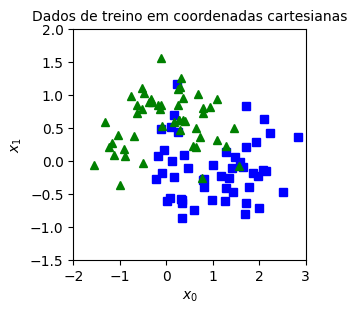

In [7]:
plt.figure(figsize=(3, 3))

plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Dados de treino em coordenadas cartesianas", fontsize=10)

plt.show()

In [8]:
clf_names['baseline'] = 'Test Case 1 - Baseline (Professor)'
clf_colors['baseline'] = '#01295F'

clfs['baseline'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10
)

clfs['baseline'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [9]:
y_random_preds['baseline'] = clfs['baseline'].predict(random_test_data)

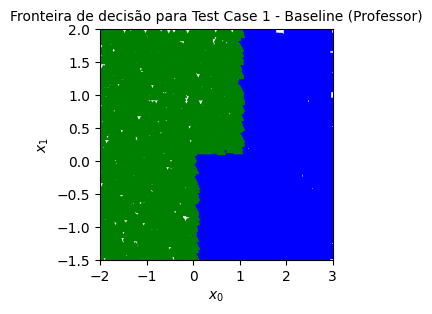

In [10]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['baseline']==1], random_test_data[:, 1][y_random_preds['baseline']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['baseline']==0], random_test_data[:, 1][y_random_preds['baseline']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['baseline']}", fontsize=10)

plt.show()

In [11]:
y_train_preds['baseline'] = clfs['baseline'].predict(X_train)
train_accs['baseline'] = accuracy_score(y_train, y_train_preds['baseline'])

In [12]:
X_test, y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

In [13]:
y_test_preds['baseline'] = clfs['baseline'].predict(X_test)
test_accs['baseline'] = accuracy_score(y_test, y_test_preds['baseline'])

In [14]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['baseline']}</b>: {train_accs['baseline']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['baseline']}</b>: {test_accs['baseline']:.3f}
</div>
""")

---

# <a id="TestParams">5. Testando Diferentes Parâmetros (a) e (b)</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

## <a id="TestParams1">5.1. [Test Case 1] max_depth = 50; min_samples_leaf = 10</a>

In [15]:
clf_names['test_case_1'] = 'Test Case 1 -  Árvore de Decisão, md 50, msl 10'
clf_colors['test_case_1'] = '#22547B'

clfs['test_case_1'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_leaf=10
)

clfs['test_case_1'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=10)

In [16]:
y_random_preds['test_case_1'] = clfs['test_case_1'].predict(random_test_data)

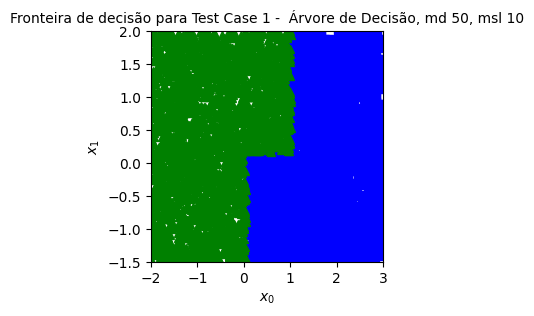

In [17]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_1']==1], random_test_data[:, 1][y_random_preds['test_case_1']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_1']==0], random_test_data[:, 1][y_random_preds['test_case_1']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_1']}", fontsize=10)

plt.show()

In [18]:
y_train_preds['test_case_1'] = clfs['test_case_1'].predict(X_train)
train_accs['test_case_1'] = accuracy_score(y_train, y_train_preds['test_case_1'])

In [19]:
y_test_preds['test_case_1'] = clfs['test_case_1'].predict(X_test)
test_accs['test_case_1'] = accuracy_score(y_test, y_test_preds['test_case_1'])

In [20]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_1']}</b>: {train_accs['test_case_1']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_1']}</b>: {test_accs['test_case_1']:.3f}
</div>
""")

In [21]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Não</b> teve mudanças em relação ao <b>{clf_names['baseline']}</b>, mesmo com um <b>max_depth</b> 10 vezes maior.</br>
    A próxima iteração irá avaliar o efeito da mudança em <b>min_samples_leaf</b>.
</div>
""")

## <a id="TestParams2">5.2. [Test Case 2] max_depth = 5; min_samples_leaf = 1</a>

In [22]:
clf_names['test_case_2'] = 'Test Case 2 -  Árvore de Decisão, md 5, msl 1'
clf_colors['test_case_2'] = '#437F97'

clfs['test_case_2'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=1
)

clfs['test_case_2'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
y_random_preds['test_case_2'] = clfs['test_case_2'].predict(random_test_data)

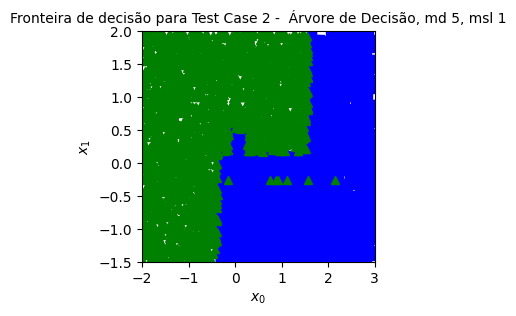

In [24]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_2']==1], random_test_data[:, 1][y_random_preds['test_case_2']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_2']==0], random_test_data[:, 1][y_random_preds['test_case_2']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_2']}", fontsize=10)

plt.show()

In [25]:
y_train_preds['test_case_2'] = clfs['test_case_2'].predict(X_train)
train_accs['test_case_2'] = accuracy_score(y_train, y_train_preds['test_case_2'])

In [26]:
y_test_preds['test_case_2'] = clfs['test_case_2'].predict(X_test)
test_accs['test_case_2'] = accuracy_score(y_test, y_test_preds['test_case_2'])

In [27]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_2']}</b>: {train_accs['test_case_2']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_2']}</b>: {test_accs['test_case_2']:.3f}
</div>
""")

In [28]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Com o <b>min_samples_leaf</b> 10 vezes menor em relação ao <b>{clf_names['baseline']}</b>, obteve-se um modelo com claro overfitting.</br>
    Inclusive, percebem-se vários exemplos "aleatórios" na <b>fronteira de decisão</b>.</br>
    Isso faz sentido porque, com um <b>min_samples_leaf</b> igual a 1, cria-se uma <b>Árvore de Decisão</b> potencialmente super especializada.</br>
    Próxima iteração irá aumentar o <b>max_depth</b> para 50 ao mesmo tempo em que diminui o <b>min_samples_leaf</b> para 1. Espera-se um <b>overfitting</b> ainda mais significativo (<b>acurácia</b> do teste muito menor que a <b>acurácia</b> do treino).
</div>
""")

## <a id="TestParams3">5.3. [Test Case 3] max_depth = 50; min_samples_leaf = 1</a>

In [29]:
clf_names['test_case_3'] = 'Test Case 3 - Árvore de Decisão, md 50, msl 1'
clf_colors['test_case_3'] = '#64895E'

clfs['test_case_3'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_leaf=1
)

clfs['test_case_3'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [30]:
y_random_preds['test_case_3'] = clfs['test_case_3'].predict(random_test_data)

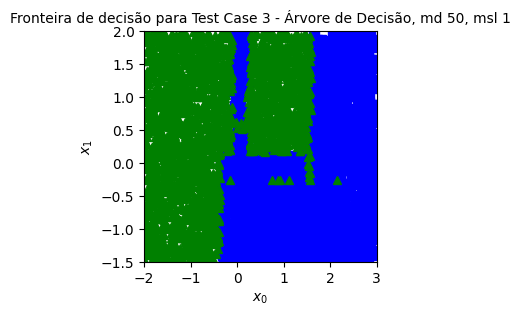

In [31]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_3']==1], random_test_data[:, 1][y_random_preds['test_case_3']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_3']==0], random_test_data[:, 1][y_random_preds['test_case_3']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_3']}", fontsize=10)

plt.show()

In [32]:
y_train_preds['test_case_3'] = clfs['test_case_3'].predict(X_train)
train_accs['test_case_3'] = accuracy_score(y_train, y_train_preds['test_case_3'])

In [33]:
y_test_preds['test_case_3'] = clfs['test_case_3'].predict(X_test)
test_accs['test_case_3'] = accuracy_score(y_test, y_test_preds['test_case_3'])

In [34]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_3']}</b>: {train_accs['test_case_3']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_3']}</b>: {test_accs['test_case_3']:.3f}
</div>
""")

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Aqui evidencia-se um <b>overfitting</b> óbvio: <b>acurácia</b> do treino chegou a 100%, e a do teste foi igual a 83.8%.<br>
    O fato do <b>modelo</b> estar super ajustado também é evidente através do gráfico da <b>fronteira de decisão</b>, que perdeu sua forma clara de "fronteira".<br>
    Agora que já vimos alguns casos do comportamento de <b>overfitting</b>, quero encontrar parâmetros que levem ao <b>underfitting</b>. Próxima iteração irá explorar essa possibilidade.
</div>

## <a id="TestParams4">5.4. [Test Case 4] max_depth = 2; min_samples_leaf = 20</a>

In [35]:
clf_names['test_case_4'] = 'Test Case 4 - Árvore de Decisão, md 2, msl 20'
clf_colors['test_case_4'] = '#849324'

clfs['test_case_4'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    min_samples_leaf=20
)

clfs['test_case_4'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=20)

In [36]:
y_random_preds['test_case_4'] = clfs['test_case_4'].predict(random_test_data)

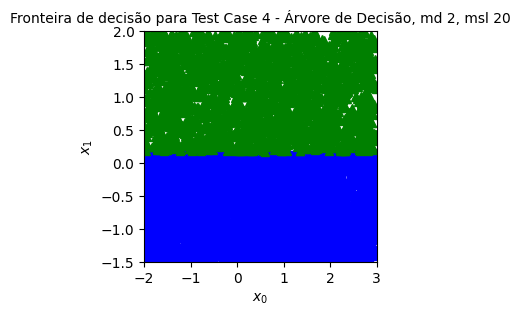

In [37]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_4']==1], random_test_data[:, 1][y_random_preds['test_case_4']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_4']==0], random_test_data[:, 1][y_random_preds['test_case_4']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_4']}", fontsize=10)

plt.show()

In [38]:
y_train_preds['test_case_4'] = clfs['test_case_4'].predict(X_train)
train_accs['test_case_4'] = accuracy_score(y_train, y_train_preds['test_case_4'])

In [39]:
y_test_preds['test_case_4'] = clfs['test_case_4'].predict(X_test)
test_accs['test_case_4'] = accuracy_score(y_test, y_test_preds['test_case_4'])

In [40]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_4']}</b>: {train_accs['test_case_4']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_4']}</b>: {test_accs['test_case_4']:.3f}
</div>
""")

In [41]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Aqui, evidencia-se uma <b>fronteira de decisão</b> claramente enviesada. É uma horizontal próxima de 0, sem considerar as nuances dos dados.<br>
    Assim, entende-se que houve <b>underfitting</b>, o que é esperado de uma <b>Árvore de Decisão</b> com <b>max_depth</b> igual à 2.<br>
    Contudo, ainda não encontramos um conjunto de parâmetros que performe melhor que o <b>{clf_names['baseline']}</b>: o <b>{clf_names['test_case_1']}</b> obteve os mesmos resultados. Deste modo, testaremos pelo menos mais uma iteração em busca dessa melhoria.
</div>
""")

## <a id="TestParams5">5.5. [Test Case 5] max_depth = 3; min_samples_leaf = 7</a>

In [42]:
clf_names['test_case_5'] = 'Test Case 5 - Árvore de Decisão, md 3, msl 7'
clf_colors['test_case_5'] = '#C2A31A'

clfs['test_case_5'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=7
)

clfs['test_case_5'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7)

In [43]:
y_random_preds['test_case_5'] = clfs['test_case_5'].predict(random_test_data)

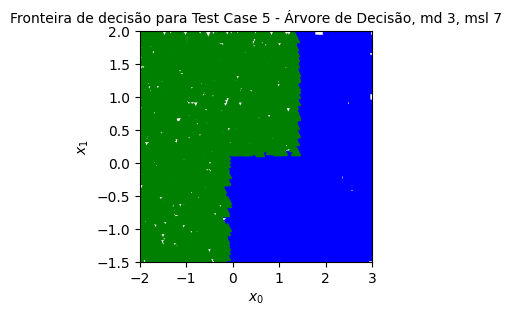

In [44]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_5']==1], random_test_data[:, 1][y_random_preds['test_case_5']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_5']==0], random_test_data[:, 1][y_random_preds['test_case_5']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_5']}", fontsize=10)

plt.show()

In [45]:
y_train_preds['test_case_5'] = clfs['test_case_5'].predict(X_train)
train_accs['test_case_5'] = accuracy_score(y_train, y_train_preds['test_case_5'])

In [46]:
y_test_preds['test_case_5'] = clfs['test_case_5'].predict(X_test)
test_accs['test_case_5'] = accuracy_score(y_test, y_test_preds['test_case_5'])

In [47]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_5']}</b>: {train_accs['test_case_5']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_5']}</b>: {test_accs['test_case_5']:.3f}
</div>
""")

In [48]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Com um <b>max_depth</b> igual a 3 e um <b>min_samples_leaf</b>, obtivemos acurácias melhores em relação ao <b>{clf_names['baseline']}</b>: 0.880 versus 0.830 no <b>teste</b>, respectivamente.</br>
    Ao mesmo tempo, não temos evidências óbvias de um <b>overfitting</b>: Apesar da <b>acurácia</b> do <b>treino</b> ser maior que a do <b>teste</b>, elas ainda são bem próximas, o que sugere que o <b>modelo</b> generaliza bem.
</div>
""")

---

# <a id="TestMoreExamples">6. Testando com mais Exemplos de Treino (c)</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Vamos agora testar com mais exemplos de treino, e os mesmos parâmetros que levaram ao <b>overfitting</b> no <b>{clf_names['test_case_3']}</b>.<br>
    A intenção é verificar se o comportamento de <b>overfitting</b> desaparece.
</div>

## <a id="TestMoreExamples1">6.1. [Test Case 6] n_samples = 1.000</a>

In [49]:
X_train, y_train = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [50]:
clf_names['test_case_6'] = 'Test Case 6 - Árvore de Decisão, ns 1000'
clf_colors['test_case_6'] = '#FFB30F'

clfs['test_case_6'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_leaf=1
)

clfs['test_case_6'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [51]:
y_random_preds['test_case_6'] = clfs['test_case_6'].predict(random_test_data)

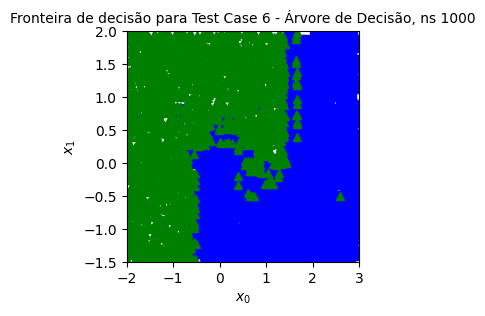

In [52]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_6']==1], random_test_data[:, 1][y_random_preds['test_case_6']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_6']==0], random_test_data[:, 1][y_random_preds['test_case_6']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_6']}", fontsize=10)

plt.show()

In [53]:
y_train_preds['test_case_6'] = clfs['test_case_6'].predict(X_train)
train_accs['test_case_6'] = accuracy_score(y_train, y_train_preds['test_case_6'])

In [54]:
y_test_preds['test_case_6'] = clfs['test_case_6'].predict(X_test)
test_accs['test_case_6'] = accuracy_score(y_test, y_test_preds['test_case_6'])

In [55]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_6']}</b>: {train_accs['test_case_6']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_6']}</b>: {test_accs['test_case_6']:.3f}
</div>
""")

In [56]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Apesar da <b>acurácia</b> do teste ter melhorado em relação ao <b>{clf_names['baseline']}</b>, ainda nota-se um comportamento de <b>overfitting</b> com a <b>acurácia</b> de teste tendo chegado a 100%.<br>
    Vamos aumentar ainda mais o tamanho do conjunto de treino.
</div>
""")

## <a id="TestMoreExamples2">6.2. [Test Case 7] n_samples = 1.000.000</a>

In [57]:
X_train, y_train = make_moons(n_samples=1000000, noise=0.3, random_state=42)

In [58]:
clf_names['test_case_7'] = 'Test Case 7 - Árvore de Decisão, ns 1000000'
clf_colors['test_case_7'] = '#FF8C12'

clfs['test_case_7'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_leaf=1
)

clfs['test_case_7'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [59]:
y_random_preds['test_case_7'] = clfs['test_case_7'].predict(random_test_data)

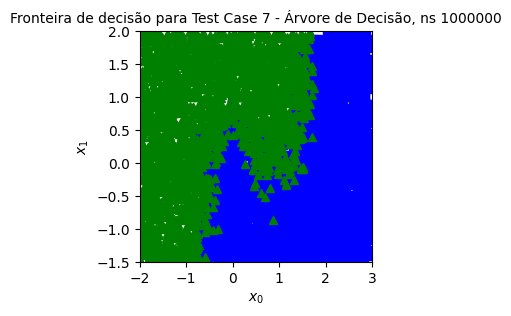

In [60]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_7']==1], random_test_data[:, 1][y_random_preds['test_case_7']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_7']==0], random_test_data[:, 1][y_random_preds['test_case_7']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_7']}", fontsize=10)

plt.show()

In [61]:
y_train_preds['test_case_7'] = clfs['test_case_7'].predict(X_train)
train_accs['test_case_7'] = accuracy_score(y_train, y_train_preds['test_case_7'])

In [62]:
y_test_preds['test_case_7'] = clfs['test_case_7'].predict(X_test)
test_accs['test_case_7'] = accuracy_score(y_test, y_test_preds['test_case_7'])

In [63]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_7']}</b>: {train_accs['test_case_7']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_7']}</b>: {test_accs['test_case_7']:.3f}
</div>
""")

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Com uma quantidade absurda de dados de treino (1 milhão de instâncias), o comportamento do <b>overfitting</b> diminui consideravelmente.
</div>

---

# <a id="TestRLKNN">7. Testando com Regressão Lógistica e K-Nearest Neighbors (d)</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [64]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Irei iterar apenas uma vez sob a <b>Regressão Logística</b> e o <b>K-Nearest Neighbors (KNN)</b>.</br>
    Para cada, irei reverter para 100 exemplos de treino, como no <b>{clf_names['baseline']}</b>, e manterei os parâmetros <i>default</i> das classes.<br>
    Lembrando apenas que terei que aplicar o <i>scaling</i> dos dados para ambos os algoritmos.
</div>
""")

In [65]:
X_train, y_train = make_moons(n_samples=100, noise=0.3, random_state=42)
random_test_data = np.random.uniform(low=[-2, -1.5], high=[3, 2], size=(5000,2))

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
random_test_data_scaled = scaler.transform(random_test_data)

## <a id="TestRLKNN1">7.1. [Test Case 8] Regressão Logística</a>

In [67]:
clf_names['test_case_8'] = 'Test Case 8 - Regressão Logística'
clf_colors['test_case_8'] = '#FE6415'

clfs['test_case_8'] = LogisticRegression(random_state=42)

clfs['test_case_8'].fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [68]:
y_random_preds['test_case_8'] = clfs['test_case_8'].predict(random_test_data_scaled)

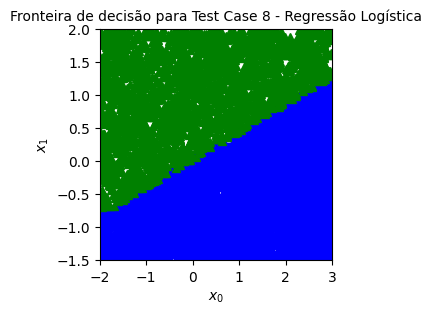

In [69]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_8']==1], random_test_data[:, 1][y_random_preds['test_case_8']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_8']==0], random_test_data[:, 1][y_random_preds['test_case_8']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_8']}", fontsize=10)

plt.show()

In [70]:
y_train_preds['test_case_8'] = clfs['test_case_8'].predict(X_train_scaled)
train_accs['test_case_8'] = accuracy_score(y_train, y_train_preds['test_case_8'])

In [71]:
y_test_preds['test_case_8'] = clfs['test_case_8'].predict(X_test_scaled)
test_accs['test_case_8'] = accuracy_score(y_test, y_test_preds['test_case_8'])

In [72]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_8']}</b>: {train_accs['test_case_8']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_8']}</b>: {test_accs['test_case_8']:.3f}
</div>
""")

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Aqui evidencia-se um <b>modelo</b> sem <b>overfitting</b> e com <b>fronteira de decisão</b> bem definida.
</div>

## <a id="TestRLKNN2">7.2. [Test Case 9] K-Nearest Neighbors</a>

In [73]:
clf_names['test_case_9'] = 'Test Case 8 - K-Nearest Neighbors'
clf_colors['test_case_9'] = '#FD151B'

clfs['test_case_9'] = KNeighborsClassifier()

clfs['test_case_9'].fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [74]:
y_random_preds['test_case_9'] = clfs['test_case_9'].predict(random_test_data_scaled)

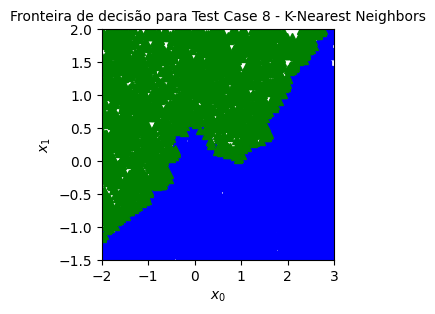

In [75]:
plt.figure(figsize=(3, 3))

plt.plot(random_test_data[:, 0][y_random_preds['test_case_9']==1], random_test_data[:, 1][y_random_preds['test_case_9']==1], "bs")
plt.plot(random_test_data[:, 0][y_random_preds['test_case_9']==0], random_test_data[:, 1][y_random_preds['test_case_9']==0], "g^")

plt.xlabel("$x_0$", fontsize=10)
plt.ylabel("$x_1$", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

plt.title(f"Fronteira de decisão para {clf_names['test_case_9']}", fontsize=10)

plt.show()

In [76]:
y_train_preds['test_case_9'] = clfs['test_case_9'].predict(X_train_scaled)
train_accs['test_case_9'] = accuracy_score(y_train, y_train_preds['test_case_9'])

In [77]:
y_test_preds['test_case_9'] = clfs['test_case_9'].predict(X_test_scaled)
test_accs['test_case_9'] = accuracy_score(y_test, y_test_preds['test_case_9'])

In [78]:
HTML(f"""
<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    <b>Acurácia</b> do <b>Treino</b> para <b>{clf_names['test_case_9']}</b>: {train_accs['test_case_9']:.3f}</br>
    <b>Acurácia</b> do <b>Teste</b> para <b>{clf_names['test_case_9']}</b>: {test_accs['test_case_9']:.3f}
</div>
""")

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Aqui, evidencia-se um <b>modelo</b> sem <b>overfitting</b> e com <b>fronteira de decisão</b> bem definida.
</div>

---

# <a id="Comparacao">8. Comparação</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
    Aqui são plotadas as <b>acurácias</b> de todos os test cases, lado a lado, à titúlo de comparação.
</div>

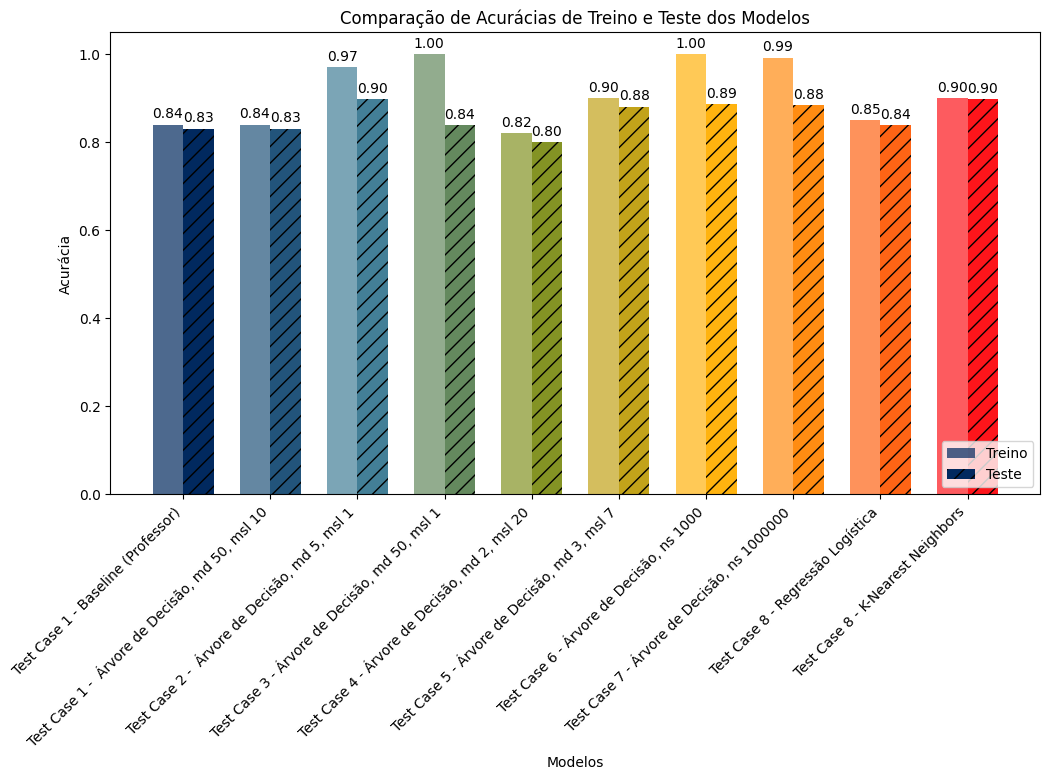

In [79]:
labels = list(clf_names.values())
train_accuracies = [train_accs[key] for key in clf_names.keys()]
test_accuracies = [test_accs[key] for key in clf_names.keys()]
colors = [clf_colors[key] for key in clf_names.keys()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars_train = ax.bar(x - width/2, train_accuracies, width, label='Treino', color=colors, alpha=0.7)
bars_test = ax.bar(x + width/2, test_accuracies, width, label='Teste', color=colors, hatch='//')

ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
ax.set_title('Comparação de Acurácias de Treino e Teste dos Modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend(loc='lower right')

for bar in bars_train:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars_test:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

---